<a href="https://colab.research.google.com/github/rohandawar/-daysforcoding/blob/main/BirdSpeciesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am creating a multiclass classification model

In [27]:
# Import the Libs

# Google
from google.colab import drive

# General
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib.image import imread

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#cv2
import cv2

# Keras
from keras.preprocessing import image
from keras.utils import img_to_array
from keras.utils import array_to_img
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras.models import Sequential

# Random
import random

# Os
from os import listdir

In [24]:
# Mount the Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# read/Locate the data in the drive
!ls /content/drive/MyDrive/DataSets/BirdSpecieesDataset

'AMERICAN GOLDFINCH'  'CARMINE BEE-EATER'  'EMPEROR PENGUIN'
'BARN OWL'	      'DOWNY WOODPECKER'    FLAMINGO


In [33]:
# random.choice(sorted(listdir('/content/drive/MyDrive/DataSets/BirdSpecieesDataset/AMERICAN GOLDFINCH')))

'019.jpg'

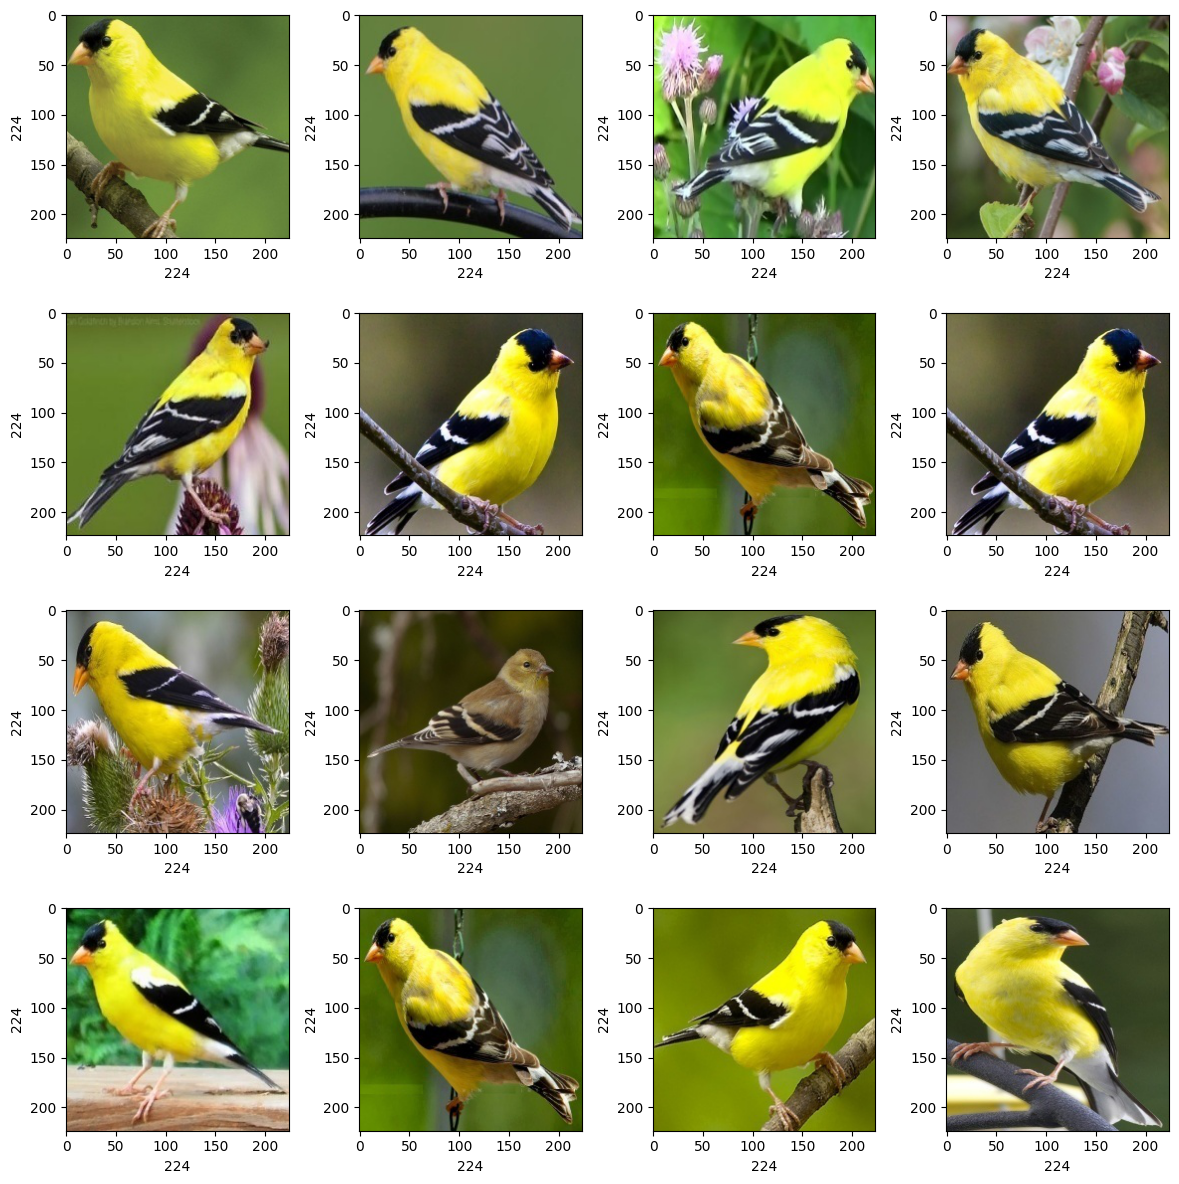

In [41]:
# plotting some sample images to check the shape
plt.figure(figsize=(12,12))
path = '/content/drive/MyDrive/DataSets/BirdSpecieesDataset/AMERICAN GOLDFINCH'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [31]:
# Set the sir for the data
dir = '/content/drive/MyDrive/DataSets/BirdSpecieesDataset'
root_dir = listdir(dir) # This would list all the sub-folders/Classes in the data
# Creating 2 empyt lists
image_list, label_list = [], []

In [42]:
# Checking the subfloders
root_dir

['DOWNY WOODPECKER',
 'FLAMINGO',
 'BARN OWL',
 'AMERICAN GOLDFINCH',
 'EMPEROR PENGUIN',
 'CARMINE BEE-EATER']

In [47]:
# Reading and conevrting the image sto numpy array
for directory in root_dir:
  for file in listdir(f'{dir}/{directory}'):
    image_path = f'{dir}/{directory}/{file}'
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [52]:
# Chekcing the number of classes count
label_count = pd.DataFrame(label_list).value_counts()
label_count

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [54]:
# Checking the number of classes
num_class = len(label_count)
num_class

6

In [59]:
# Checking one sample image shape
image_list[2].shape

(224, 224, 3)

In [61]:
# Checking the Label Shape
label_list = np.array(label_list)
label_list.shape

(811,)

In [63]:
# Train & test Split
x_train,x_test,y_train,y_test = train_test_split(image_list, label_list, test_size=.2, random_state=10)

In [64]:
# Normalize & reshape the data
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0

# Reshape
x_train = x_train.reshape(-1,224,224,3)
x_test = x_test.reshape(-1,224,224,3)


In [69]:
# Label Binarize
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [70]:
y_train

array([[0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [71]:
# Splitting the validation & training dataset
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size=0.2)

In [ ]:
# model building
model = Sequential()

